In [1]:
import numpy as np

## 역행렬과 선형 연립방정식의 해

선형연립방정식에서 미지수의 수와 방정식의 수가 같은 경우 계수행렬인 $A$는 정방행렬이다.

여기서 정방행렬 $A$의 역행렬 $A^{-1}$이 존재하는 경우 선형연립방정식의 해를 구할 수 있다.

$$Ax = b$$

계수행렬 $A$에서 미지수 벡터 $x$를 곱하면 상수벡터 $b$가 된다.

$$A^{-1}Ax = A^{-1}b$$

$$A^{-1}A = I$$이므로

$$Ix = A^{-1}b$$

$$x = A^{-1}b$$

가 되며 최종적으로 $A$의 역행렬과 벡터 $b$를 곱해 미지수 벡터 $x$를 구할 수 있다.

In [21]:
A = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1]])
A

array([[1, 1, 0],
       [0, 1, 1],
       [1, 1, 1]])

In [22]:
b = np.array([[2],[2],[3]])
b

array([[2],
       [2],
       [3]])

In [24]:
# A의 역행렬 @ b

x = np.linalg.inv(A) @ b
x

array([[1.],
       [1.],
       [1.]])

In [27]:
# A와 미지수 벡터를 곱한 벡터와 b벡터의 차이는 영벡터가 된다.

A @ x - b

array([[0.],
       [0.],
       [0.]])

이 과정을 numpy의 lstsq() 메소드로 쉽게 구할 수 있다.

lstsq()메소드는 OLS문제의 답인 미지수 벡터 x, 잔차제곱합 (resid), 랭크(rank), 특잇값(s)를 구한다.

In [29]:
x, resid, rank, s = np.linalg.lstsq(A, b)

x

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[1.],
       [1.],
       [1.]])

## 선형 연립방정식과 선형 예측 모형

앞서 정리한 선형 연립방정식의 해를 구하는 문제를 회귀모델의 가중치 벡터 $w$를 구하는 문제로 응용할 수 있다.

\begin{split}
\begin{align}
\begin{matrix}
x_{11} w_1 & + \;& x_{12} w_2   &\; + \cdots + \;& x_{1N} w_N &\; = \;& y_1 \\
x_{21} w_1 & + \;& x_{22} w_2   &\; + \cdots + \;& x_{2N} w_N &\; = \;& y_2 \\
\vdots\;\;\; &   & \vdots\;\;\; &                & \vdots\;\;\; &     & \;\vdots \\
x_{N1} w_1 & + \;& x_{N2} w_2   &\; + \cdots + \;& x_{NN} w_N &\; = \;& y_N \\
\end{matrix}
\end{align}
\end{split}

$$Xw = y$$

선형회귀 모델의 목적은 가중치 벡터 $w$를 찾는 것으로 $w = X^{-1}y$가 된다.

In [60]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target
A = X[:4,[0,4,5,6]] # CRIM, NOX, RM, AGE
b = y[:4]

In [61]:
A

array([[6.320e-03, 5.380e-01, 6.575e+00, 6.520e+01],
       [2.731e-02, 4.690e-01, 6.421e+00, 7.890e+01],
       [2.729e-02, 4.690e-01, 7.185e+00, 6.110e+01],
       [3.237e-02, 4.580e-01, 6.998e+00, 4.580e+01]])

In [62]:
b

array([24. , 21.6, 34.7, 33.4])

In [63]:
w = np.linalg.inv(A) @ b
w

array([-3.12710043e+02, -1.15193942e+02,  1.44996465e+01, -1.13259317e-01])

In [70]:
A @ w - b

array([ 1.42108547e-14, -4.26325641e-14, -2.13162821e-14, -4.26325641e-14])

In [73]:
# np.linalg.lstsq()

w, resid, rank, s = np.linalg.lstsq(A, b)
w

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


array([-3.12710043e+02, -1.15193942e+02,  1.44996465e+01, -1.13259317e-01])

여기서 문제는 방정식의 수가 미지수의 수보다 적거나 많은 경우이다.

선형연립방정식에서 위의 경우 해가 무수히 많거나 모든 조건을 만족하는 해가 존재하지 않을 수 있다.

하지만 실제 타겟값과 예측값의 오차를 최소한으로 만든다면 이 문제는 **근삿값을 구하는 문제**로 해결할 수 있다.

여기서 타겟값과 예측값의 오차를 **잔차(residual)**이라 한다.

$$e = y - \hat{y}$$

선형회귀분석에서 잔차벡터 $e$는 실제값과 예측값의 차이를 나타내며 **잔차제곱합(RSS)**은 벡터 $e$의 norm의 제곱으로 표시할 수 있다.

$$e^Te = ||e||^2 = y- \hat{y} = y - Xw$$

In [74]:
e = np.arange(5)
e

array([0, 1, 2, 3, 4])

In [75]:
e.T @ e

30

In [77]:
np.linalg.norm(e) ** 2

30.0

## 최소자승법(OLS)

즉, 잔차제곱합이 영벡터에 최대한 가까워지는 가중치 벡터 $w$를 구하는 문제가 된다.

RSS(잔차제곱합)을 가장 작게 만드는 가중치 벡터 $w$를 위의 내용을 이용해 정리하면 다음과 같이 표현할 수 있다.

$$RSS = e^Te$$
$$= (y - Xw)^T(y - Xw)$$
$$= y^Ty - 2y^TXw+w^TX^TXw$$

이렇게 정리한 식을 이용해 RSS를 최소로 만드는 가중치 벡터를 구하기 위한 방법으로 최적화를 이용할 수 있다.

즉, 위 식을 $w$로 미분하여 잔차 제곱합의 그래디언트 벡터가 0이 되면 된다.

$$\dfrac{dRSS}{dw} = -2X^Ty + wX^TXw$$

그래디언트 벡터가 0이 되어야 하기 때문에 다음의 식이 성립한다.

$$X^TXw^* =  X^Ty$$

여기서 정방행렬인 $X^TX$의 역행렬이 존재한다면 가중치 벡터 $w^*$를 다음의 식으로 구할 수 있게된다.

> $$w^* = (X^TX)^{-1}X^Ty$$

위 식에서 $y$의 앞부분을 의사역행렬(pseudo inverse)라 하며 $A^+$로도 표기할 수 있다.

In [106]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [107]:
# 가중치 벡터 계산

w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

12228.046261044003

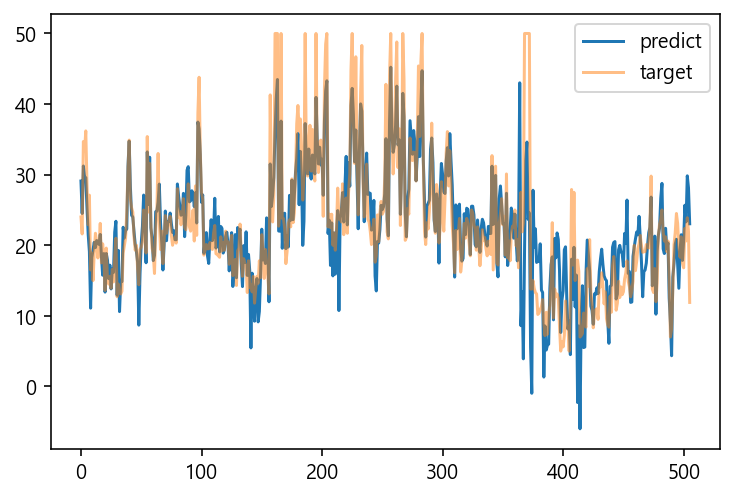

In [108]:
plt.plot(X @ w, label='predict')
plt.plot(y, label='target', alpha=0.5)
plt.legend()

# 잔차제곱합
np.linalg.norm(X@w - y) ** 2

In [109]:
# lstsq() 메소드를 이용한 가중치 벡터 계산

w, resid, rank, s = np.linalg.lstsq(X, y)
w

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])